In [42]:
import pandas as pd

data = pd.read_csv('TestPad_PCB_XYRGB_V2.csv')

In [43]:
# For now we will only use RGB
features = ['R', 'G', 'B']
X = data[features]
y = data['Grey']

In [44]:
from sklearn.model_selection import train_test_split

#Using stratify=True as data will be imbalanced otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print("Class distribution in training set:\n", y_train.value_counts())
print("---")
print("Class distribution in testing set:\n", y_test.value_counts())

Class distribution in training set:
 Grey
0    569319
1      9522
Name: count, dtype: int64
---
Class distribution in testing set:
 Grey
0    142330
1      2381
Name: count, dtype: int64


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [48]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=256, validation_data=(X_test_scaled, y_test))


Epoch 1/10


2262/2262 ━━━━━━━━━━━━━━━━━━━━ 3s 853us/step - accuracy: 0.9804 - loss: 0.1040 - val_accuracy: 0.9946 - val_loss: 0.0150
Epoch 2/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.9949 - loss: 0.0131 - val_accuracy: 0.9964 - val_loss: 0.0089
Epoch 3/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.9966 - loss: 0.0086 - val_accuracy: 0.9960 - val_loss: 0.0087
Epoch 4/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.9974 - loss: 0.0069 - val_accuracy: 0.9979 - val_loss: 0.0059
Epoch 5/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9977 - loss: 0.0059 - val_accuracy: 0.9984 - val_loss: 0.0047
Epoch 6/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 0.9986 - val_loss: 0.0041
Epoch 7/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - accuracy: 0.9983 - loss: 0.0044 - val_accuracy: 0.9988 - val_loss: 0.0035
Epoch 8/10
2262/2262 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9986 - loss: 0.00

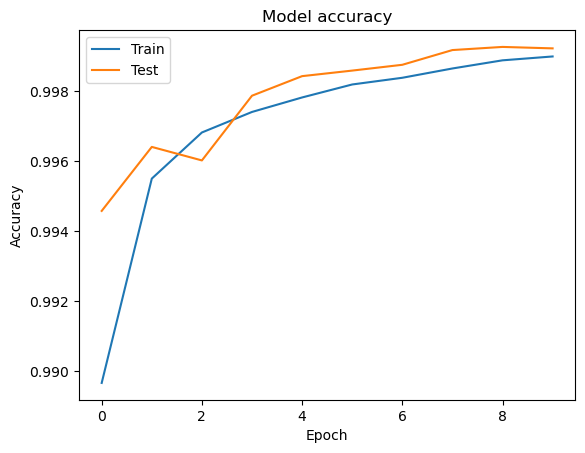

4523/4523 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142330
           1       0.96      0.99      0.98      2381

    accuracy                           1.00    144711
   macro avg       0.98      0.99      0.99    144711
weighted avg       1.00      1.00      1.00    144711



In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict on test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred))
